# One-Way or One-Factor ANOVA

One-way ANOVA is a statistical test used to compare the means of three or more groups with one independent variable.

**Conditions for Using ANOVA include:**

- There should be one or more independent variables with three or more groups/levels
- Samples are randomly selected
- Each sample or group must be independent from the others
- Data in each group should be approximately normally distributed
- Dependent variable should be continuous, allowing for means to be calculated within each group
- The groups should have equal variances

**A. The formula to calculate F-statistic for ANOVA is:**

$$ F(cal.) = \frac{\ MSS_B}{\ MSS_W} = \frac{\ Between \ sample \ variance}{\ Within \ sample \ variance}$$

Where: 

$\ MSS_B$ = Mean sum of squares between samples

$\ MSS_W$ = Mean sum of squaares within samples

<br>

**B. The formula to calculate mean sum of squares between samples is:**


$$\ MSS_B = \frac{\ SS_B}{(k-1)} = \frac{\ SS_B}{df_B}$$ 

Where: 

$SS_B$ = Sum of squares between samples

k = Number of populations or groups

$df_B$ = Degrees of freedom between samples = Numerator degrees of freedom

<br>

**C. The formula to calculate mean sum of squares within samples is:**

$$\ MSS_W = \frac{\ SS_W}{(n-k)} = \frac{\ SS_W}{df_W}$$

Where: 

$SS_W$ = Sum of squares within samples

n = Total number of observations in all the populations or groups

k = Number of populations or groups

$df_W$ = Degrees of freedom within samples = Denominator degrees of freedom



### *Question 1*

**Question 1:** Perform a one-way ANOVA test at the 95% confidence level to determine whether the volume of bottles produced by the three machines differs significantly. The data showing bottle volumes produced by Machine 1 (m1), Machine 2 (m2), and Machine 3 (m3) are given as:

m1 = [150, 151, 152, 152, 151, 150]

m2 = [153, 152, 148, 151, 149, 152]

m3 = [156, 154, 155, 156, 157, 155]

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.oneway as oneway 

**Creating Data**

In [2]:
# Using the same data, presented as lists, as provided in the question above
m1 = [150, 151, 152, 152, 151, 150]
m2 = [153, 152, 148, 151, 149, 152]
m3 = [156, 154, 155, 156, 157, 155]

**Visualizing Data**

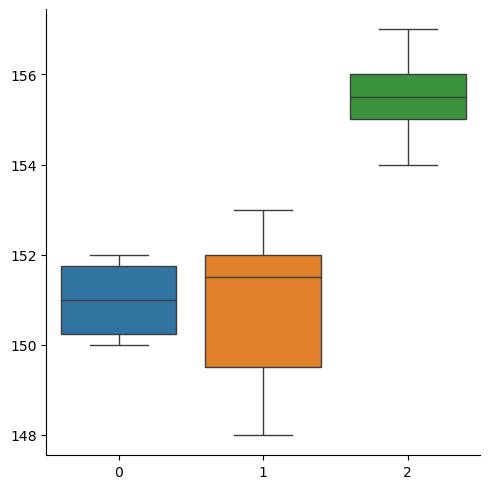

In [3]:
# creating box-and-whisker plots showing the volumes of bottles produced by each machine
sns.catplot(data=(m1, m2, m3), kind='box')

**Stating Hypothesis**

Null hypothesis H0: $\mu_1$ = $\mu_2$ = $\mu_3$ (The mean volume of bottles produced by Machine 1, Machine 2, and Machine 3 are all equal)

Alternative hypothesis H1: At least one machine produces bottles with a different mean volume

**Selecting the Level of Significance or α Level**

*ANOVA is inherently a one-tailed test*. If we choose a confidence level of 95% (i.e., 1 - α), the corresponding significance level is 5% (α = 0.05). 

**Calculating Test Statistic and P-Value**

In [4]:
# Using Scipy.stats library
stats.f_oneway(m1, m2, m3)

F_onewayResult(statistic=22.264705882352935, pvalue=3.2374085509077445e-05)

In [5]:
# Using Statsmodels library
oneway.anova_oneway(data=(m1, m2, m3), use_var='equal')
# Since the ANOVA test assumes equal variances, we specify 'use_var = equal'

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 22.264705882352896
pvalue = 3.237408550907777e-05
df = (2.0, 15.0)
df_num = 2.0
df_denom = 15.0
nobs_t = 18.0
n_groups = 3
means = array([151.        , 150.83333333, 155.5       ])
nobs = array([6., 6., 6.])
vars_ = array([0.8       , 3.76666667, 1.1       ])
use_var = 'equal'
welch_correction = True
tuple = (22.264705882352896, 3.237408550907777e-05)

**Interpreting Results**

Since the p-value is less than α (0.05), we reject the null hypothesis. Therefore, we conclude that at least one machine produces bottles with a mean volume that is significantly different from the others.

### *Question 2*

**Question 2:** Using the built-in MPG dataset from the Seaborn library, perform a one-way ANOVA test at the 95% confidence level to determine whether the mpg (miles per gallon) of four-cylinder cars produced in the USA, Japan, and Europe differs significantly.

**Loading Data**

In [6]:
# Checking the MPG Dataset in the Seaborn library
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [7]:
# Loading the MPG Dataset, a built-in data in the Seaborn library
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [8]:
# Checking info() method
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
# Checking describe() method to see statistical summary of the numerical columns of the dataset
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [10]:
# Using the 'groupby' method to group together the rows based off of the 'origin' and 'cylinders' columns and performing aggregate function such as mean()
mpg.groupby(['origin', 'cylinders']).mean(numeric_only=True)

mpg  displacement  horsepower       weight  \
origin cylinders                                                     
europe 4          28.411111    104.222222   78.311475  2330.015873   
       5          27.366667    145.000000   82.333333  3103.333333   
       6          20.100000    159.750000  113.500000  3382.500000   
japan  3          20.550000     72.500000   99.250000  2398.500000   
       4          31.595652     99.768116   75.579710  2153.492754   
       6          23.883333    156.666667  115.833333  2882.000000   
usa    4          27.840278    124.284722   80.956522  2437.166667   
       6          19.663514    226.283784   99.671233  3213.905405   
       8          14.963107    345.009709  158.300971  4114.718447   

                  acceleration  model_year  
origin cylinders                            
europe 4             16.722222   75.507937  
       5             18.633333   79.000000  
       6             16.425000   78.250000  
japan  3             13.250000   75.500000  
       4             16.569565   77.507246  
       6             13.550000   78.000000  
usa    4             16.526389   78.027778  
       6             16.474324   75.635135  
       8             12.955340   73.902913

**Visualizing Data** 

In [11]:
# Filtering out the 'mpg' column from the mpg DataFrame based on 'cylinders == 4' 
mpg[mpg['cylinders'] == 4]['mpg']

14     24.0
18     27.0
19     26.0
20     25.0
21     24.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 204, dtype: float64

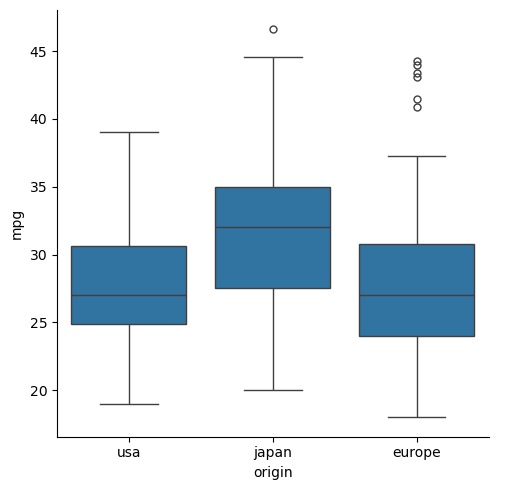

In [12]:
# creating box-and-whisker plots showing the mpg of 4-cylinder cars made in the USA, Japan, and Europe.
sns.catplot(data=mpg, x='origin', y=mpg[mpg['cylinders'] == 4]['mpg'], kind='box')

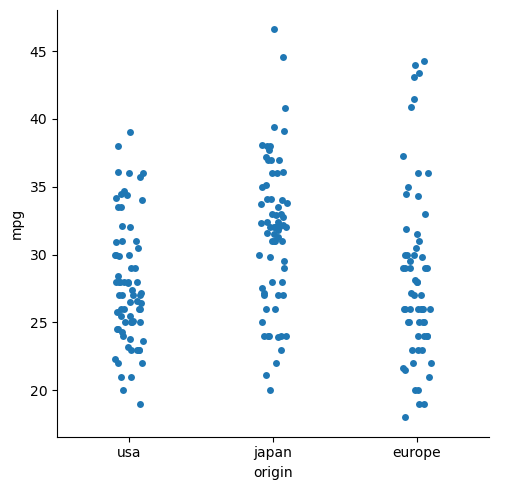

In [13]:
# Making strip plots
sns.catplot(data=mpg, x='origin', y= mpg[mpg['cylinders'] == 4]['mpg'], kind='strip')

In [14]:
# Filtering out the mpg column for 4-cylinder cars (cylinders = 4) from Europe (origin = "europe"), Japan (origin = "Japan"), and the USA (origin = "usa"), and storing the data in the variables eu, jp, and us, respectively. 
eu = mpg[(mpg['origin'] == 'europe') & (mpg['cylinders'] == 4)]['mpg']
jp = mpg[(mpg['origin'] == 'japan') & (mpg['cylinders'] == 4)]['mpg']
us = mpg[(mpg['origin'] == 'usa') & (mpg['cylinders'] == 4)]['mpg']

**Stating Hypothesis**

Null hypothesis H0: $\mu_1$ = $\mu_2$ = $\mu_3$ (The mean mpg of 4-cylinder cars from Europe, Japan, and USA are all equal)

Alternative hypothesis H1: At least one of the three locations produces 4-cylinder cars with a different mean mpg

**Selecting the Level of Significance or α Level**

*ANOVA is inherently a one-tailed test*. If we choose a confidence level of 95% (i.e., 1 - α), the corresponding significance level is 5% (α = 0.05). 

**Calculating Test Statistic and P-Value**

In [15]:
# Using Scipy.stats library
stats.f_oneway(eu, jp, us)

F_onewayResult(statistic=9.411845545485601, pvalue=0.00012379894210177303)

In [16]:
# Using Statsmodels library
oneway.anova_oneway(data=(eu, jp, us), use_var='equal')
# Since the ANOVA test assumes equal variances, we specify 'use_var = equal'

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 9.411845545485592
pvalue = 0.00012379894210177455
df = (2.0, 201.0)
df_num = 2.0
df_denom = 201.0
nobs_t = 204.0
n_groups = 3
means = array([28.41111111, 31.59565217, 27.84027778])
nobs = array([63., 69., 72.])
vars_ = array([41.50584229, 29.54777494, 20.6984957 ])
use_var = 'equal'
welch_correction = True
tuple = (9.411845545485592, 0.00012379894210177455)

**Interpreting Results**

Since the p-value is less than α (0.05), we reject the null hypothesis. Therefore, we conclude that at least one of the three locations produces 4-cylinder cars with a mean mpg (miles per gallon) that is significantly different from the others.

# Post-Hoc Tests Following the ANOVA F-Test

Post-Hoc Tests are used to uncover specific differences between three or more group means when an analysis of variance (ANOVA) test is significant.

### Tukey’s Range Test or Tukey’s Test or Tukey's HSD Test

Among the various types of **post-hoc tests**, Tukey's range test—also known as Tukey's test or Tukey's HSD (Honestly Significant Difference) test—is one of the most commonly used. It is a single-step multiple comparison procedure and statistical test that compares the means of all possible pairs of groups.

**Importing Libraries**

In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd 

### *Tukey's HSD Test for Question 1*

**Loading Data**

In [18]:
# Importing the same data as in the question 1 above
m1 = [150, 151, 152, 152, 151, 150]
m2 = [153, 152, 148, 151, 149, 152]
m3 = [156, 154, 155, 156, 157, 155]

In [19]:
# Converting the given lists of data into DataFrames
df_m1 = pd.DataFrame(data={'Volume': m1, 'Machine': 'Machine 1'})
df_m2 = pd.DataFrame(data={'Volume': m2, 'Machine': 'Machine 2'})
df_m3 = pd.DataFrame(data={'Volume': m3, 'Machine': 'Machine 3'})

In [20]:
# Concatinating three dataFrames together and asssigning the new dataFrame to a variable called df_m1_m2_m3
df_m1_m2_m3 = pd.concat([df_m1, df_m2, df_m3])

**Performing Tukey's HSD Test**

In [21]:
# Performing Tukey's HSD Test and storing the result to a variable called result_vol
result_vol = pairwise_tukeyhsd(endog=df_m1_m2_m3['Volume'], groups=df_m1_m2_m3['Machine'], alpha=0.05)

In [22]:
# Printing the test results
print(result_vol)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
Machine 1 Machine 2  -0.1667  0.976 -2.2277 1.8944  False
Machine 1 Machine 3      4.5 0.0001  2.4389 6.5611   True
Machine 2 Machine 3   4.6667 0.0001  2.6056 6.7277   True
---------------------------------------------------------


**Interpreting Results**

As revealed by Tukey’s HSD test, the p-value is less than α (0.05) for the pairwise comparisons between Machine 1 and Machine 3, and between Machine 2 and Machine 3. Therefore, we conclude that the mean volume of bottles produced by Machine 1 and Machine 3, and by Machine 2 and Machine 3, differs significantly.

### *Tukey's HSD Test for Question 2*

**Loading Data**

In [23]:
# Importing the same data as in the question 2 above
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [24]:
# Reducing data (i.e., creating a new dataFrame 'df' by pulling the 'mpg' and the 'origin' columns out)
df = mpg[mpg['cylinders'] == 4][['mpg', 'origin']]
df.head()

,mpg,origin
14,24.0,japan
18,27.0,japan
19,26.0,europe
20,25.0,europe
21,24.0,europe


**Performing Tukey's HSD Test**

In [25]:
# Performing Tukey's HSD Test and storing the result to a variable called result_mpg
result_mpg = pairwise_tukeyhsd(endog=df['mpg'], groups=df['origin'], alpha=0.05)

In [26]:
# Printing the test results
print(result_mpg)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
europe  japan   3.1845  0.003  0.9267  5.4423   True
europe    usa  -0.5708 0.8186 -2.8061  1.6644  False
 japan    usa  -3.7554 0.0002 -5.9382 -1.5726   True
----------------------------------------------------


**Interpreting Results**

As revealed by Tukey’s HSD test, the p-value is less than α (0.05) for the pairwise comparisons between European and Japanese cars, and between Japanese and US cars. Therefore, we conclude that the mpg of 4-cylinder cars produced in Europe and Japan, and in Japan and the US, differs significantly.